In [2]:
# Steps taken
# 1.Load the libraries
# 2.Data Cleaning
# 3.Assigning Binary Values to Labels
# 4.Data Visualization (Part-1)
# 5.LowerCasing, Punctuation removing and Vocabulary modifications
# 6.Counting The Occurence of Words
# 7.Training, Testing Part of the model
# 8.Data Visualization (Part-2)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# import os
# print(os.listdir("../input"))

In [6]:
# filepath='C:\Users\mounika\Desktop\input\new.csv'
df=pd.read_csv("new.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# data cleaning

In [8]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'labels','v2': 'sms'})
df.head()

,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Assigning Binary Values

In [10]:
df['labels']=df.labels.map({'spam':0, 'ham':1})
df.head()

,labels,sms
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.shape

(5572, 2)

In [12]:
df['length']=df['sms'].apply(len)
df.head()

,labels,sms,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# Data Visualization (Part-1)

No handles with labels found to put in legend.


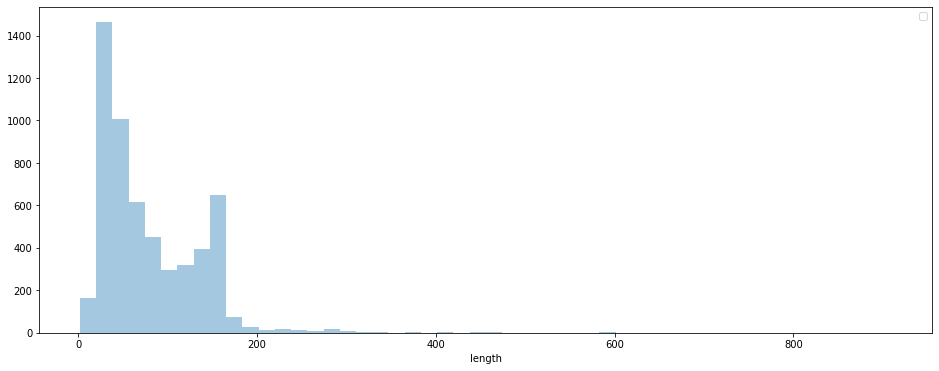

In [14]:
plt.figure(figsize=(16,6))
sns.distplot(a=df['length'],kde=False)
plt.legend()

In [15]:
message=df[df['length']==910]['sms'].iloc[0]
message

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [16]:
# LowerCasing, Punctuations and Vocab. modifications
# Now we will implement Bag of Words which will count the number of words based on their frequency distribution and that binary number will be fed for Machine Learning model

In [17]:
message={"""
For me the love should start 
         with attraction.i should feel that 
         I need her every time around me.she should be the first thing which comes in my thoughts.
         I would start the day and end it with her.she should be there every time I dream.love will be 
         then when my every breath has her name.my life should happen around her.my life will be named to her.
         I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.
         I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that 
         my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when 
         I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.
         will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.
"""}
lower_case=[]
for i in message:
    lower_case=[i.lower() for i in message]
    print(lower_case)

["\nfor me the love should start \n         with attraction.i should feel that \n         i need her every time around me.she should be the first thing which comes in my thoughts.\n         i would start the day and end it with her.she should be there every time i dream.love will be \n         then when my every breath has her name.my life should happen around her.my life will be named to her.\n         i would cry for her.will give all my happiness and take all her sorrows.i will be ready to fight with anyone for her.\n         i will be in love when i will be doing the craziest things for her.love will be when i don't have to proove anyone that \n         my girl is the most beautiful lady on the whole planet.i will always be singing praises for her.love will be when \n         i start up making chicken curry and end up makiing sambar.life will be the most beautiful then.\n         will get every morning and thank god for the day because she is with me.i would like to say a lot..will

In [18]:
# Now we will use punctutation for sorting out the sentences

In [19]:
sans_punctuation = []
import string

for i in lower_case:
    sans_punctuation.append(i.translate(str.maketrans('', '', string.punctuation)))
print(sans_punctuation)

['\nfor me the love should start \n         with attractioni should feel that \n         i need her every time around meshe should be the first thing which comes in my thoughts\n         i would start the day and end it with hershe should be there every time i dreamlove will be \n         then when my every breath has her namemy life should happen around hermy life will be named to her\n         i would cry for herwill give all my happiness and take all her sorrowsi will be ready to fight with anyone for her\n         i will be in love when i will be doing the craziest things for herlove will be when i dont have to proove anyone that \n         my girl is the most beautiful lady on the whole planeti will always be singing praises for herlove will be when \n         i start up making chicken curry and end up makiing sambarlife will be the most beautiful then\n         will get every morning and thank god for the day because she is with mei would like to say a lotwill tell later\n']


In [20]:
preprocessed_documents = []
for i in sans_punctuation:
     preprocessed_documents=[[w for w in i.split()] for i in message]
print(preprocessed_documents)

[['For', 'me', 'the', 'love', 'should', 'start', 'with', 'attraction.i', 'should', 'feel', 'that', 'I', 'need', 'her', 'every', 'time', 'around', 'me.she', 'should', 'be', 'the', 'first', 'thing', 'which', 'comes', 'in', 'my', 'thoughts.', 'I', 'would', 'start', 'the', 'day', 'and', 'end', 'it', 'with', 'her.she', 'should', 'be', 'there', 'every', 'time', 'I', 'dream.love', 'will', 'be', 'then', 'when', 'my', 'every', 'breath', 'has', 'her', 'name.my', 'life', 'should', 'happen', 'around', 'her.my', 'life', 'will', 'be', 'named', 'to', 'her.', 'I', 'would', 'cry', 'for', 'her.will', 'give', 'all', 'my', 'happiness', 'and', 'take', 'all', 'her', 'sorrows.I', 'will', 'be', 'ready', 'to', 'fight', 'with', 'anyone', 'for', 'her.', 'I', 'will', 'be', 'in', 'love', 'when', 'I', 'will', 'be', 'doing', 'the', 'craziest', 'things', 'for', 'her.love', 'will', 'be', 'when', 'I', "don't", 'have', 'to', 'proove', 'anyone', 'that', 'my', 'girl', 'is', 'the', 'most', 'beautiful', 'lady', 'on', 'the',

In [21]:
# Now we begin with counting the numbers as how much is their frequency

In [22]:
import pprint
from collections import Counter
frequency_num=[]

for i in preprocessed_documents:
    frequency_count=Counter(i)
    frequency_num.append(frequency_count)
pprint.pprint(frequency_num)

[Counter({'be': 11,
          'will': 10,
          'the': 8,
          'I': 8,
          'should': 5,
          'for': 5,
          'with': 4,
          'every': 4,
          'my': 4,
          'and': 4,
          'when': 4,
          'to': 4,
          'start': 3,
          'her': 3,
          'would': 3,
          'love': 2,
          'that': 2,
          'time': 2,
          'around': 2,
          'in': 2,
          'day': 2,
          'end': 2,
          'life': 2,
          'her.': 2,
          'all': 2,
          'anyone': 2,
          'her.love': 2,
          'is': 2,
          'most': 2,
          'beautiful': 2,
          'up': 2,
          'For': 1,
          'me': 1,
          'attraction.i': 1,
          'feel': 1,
          'need': 1,
          'me.she': 1,
          'first': 1,
          'thing': 1,
          'which': 1,
          'comes': 1,
          'thoughts.': 1,
          'it': 1,
          'her.she': 1,
          'there': 1,
          'dream.love': 1,
          't

In [23]:
# Counting The Occurence of Words
# Let's try the above with CountVectorizer tool



In [24]:
count_vector=CountVectorizer()
print(count_vector)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [25]:
# Now, using count_vector i have converted the words to vocabulary as well

In [26]:
count_vector.fit(message)
voc=count_vector.get_feature_names()
voc

['all',
 'always',
 'and',
 'anyone',
 'around',
 'attraction',
 'be',
 'beautiful',
 'because',
 'breath',
 'chicken',
 'comes',
 'craziest',
 'cry',
 'curry',
 'day',
 'doing',
 'don',
 'dream',
 'end',
 'every',
 'feel',
 'fight',
 'first',
 'for',
 'get',
 'girl',
 'give',
 'god',
 'happen',
 'happiness',
 'has',
 'have',
 'her',
 'in',
 'is',
 'it',
 'lady',
 'later',
 'life',
 'like',
 'lot',
 'love',
 'makiing',
 'making',
 'me',
 'morning',
 'most',
 'my',
 'name',
 'named',
 'need',
 'on',
 'planet',
 'praises',
 'proove',
 'ready',
 'sambar',
 'say',
 'she',
 'should',
 'singing',
 'sorrows',
 'start',
 'take',
 'tell',
 'thank',
 'that',
 'the',
 'then',
 'there',
 'thing',
 'things',
 'thoughts',
 'time',
 'to',
 'up',
 'when',
 'which',
 'whole',
 'will',
 'with',
 'would']

In [27]:
# we convert the message words to array form

In [28]:
doc_to_array=count_vector.transform(voc).toarray()
doc_to_array

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [29]:
frequency_matrix = pd.DataFrame(doc_to_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,all,always,and,anyone,around,attraction,be,beautiful,because,breath,...,thoughts,time,to,up,when,which,whole,will,with,would
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# Training and Testing the model

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['sms'],df['labels'],random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))
# X_test.fillna('', inplace=True)
# X_train.fillna('', inplace = True)
# y_test.fillna('', inplace=True)
# y_train.fillna('',inplace = True)

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [33]:
training_data=count_vector.fit_transform(X_train)
testing_data=count_vector.transform(X_test)

In [34]:
mnb=MultinomialNB()
mnb.fit(training_data, y_train)

predictions=mnb.predict(testing_data)
mnb_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))



Accuracy score:  0.9856424982053122
precision score:  0.990139687756779
recall score:  0.9934047815333883
f1 score:  0.9917695473251028


In [35]:
# decision tree

dtc=DecisionTreeClassifier()
dtc.fit(training_data,y_train)

predictions=dtc.predict(testing_data)
dtc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9626704953338119
precision score:  0.9817427385892116
recall score:  0.9752679307502061
f1 score:  0.978494623655914


In [36]:
# RandomForest Classifier
rfc=RandomForestClassifier()
rfc.fit(training_data,y_train)

predictions=rfc.predict(testing_data)
rfc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9834888729361091
precision score:  0.9813915857605178
recall score:  1.0
f1 score:  0.99060841159657


In [37]:
knn=KNeighborsClassifier()
knn.fit(training_data, y_train)

predictions=knn.predict(testing_data)
knn_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9217516152189519
precision score:  0.9175491679273827
recall score:  1.0
f1 score:  0.9570019723865877


In [38]:
bgc=BaggingClassifier()
bgc.fit(training_data, y_train)

predictions=bgc.predict(testing_data)
bgc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9720028715003589
precision score:  0.9891666666666666
recall score:  0.9785655399835119
f1 score:  0.9838375466224617


In [39]:
#AdaBoost
adb=AdaBoostClassifier()
adb.fit(training_data, y_train)
predictions=adb.predict(testing_data)
adb_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9763101220387652
precision score:  0.9796747967479674
recall score:  0.9934047815333883
f1 score:  0.9864920180106427


No handles with labels found to put in legend.


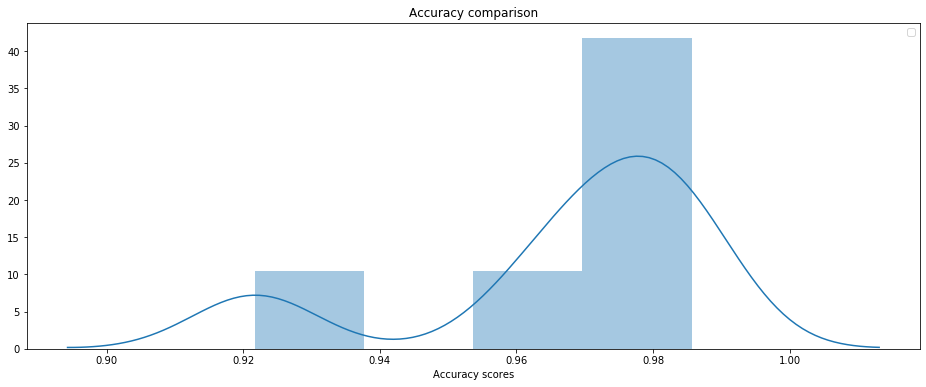

In [40]:
# Data Visualization (Part-2)
clf=(mnb_accuracy,dtc_accuracy,rfc_accuracy,knn_accuracy,bgc_accuracy,adb_accuracy)
plt.figure(figsize=(16,6))
sns.distplot(a=clf, hist=True)
plt.xlabel('Accuracy scores')
plt.title('Accuracy comparison')
plt.legend()

No handles with labels found to put in legend.


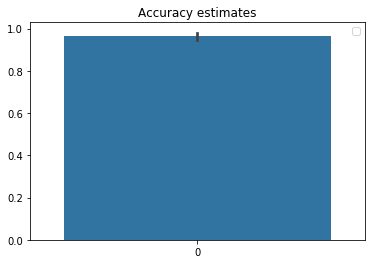

In [41]:
sns.barplot(data=clf)
plt.title('Accuracy estimates')
plt.legend()

In [42]:
cm=true_positive, false_negative, false_positive, true_negative = confusion_matrix(y_test,predictions).ravel()
print('True positive : ',true_positive)
print('False negative : ',false_negative)
print('False positive : ',false_positive)
print('True negative : ',true_negative)

accuracy = (true_positive + true_negative)/(true_positive + false_negative + false_positive + true_negative)
print('General accuracy : ',accuracy)

True positive :  155
False negative :  25
False positive :  8
True negative :  1205
General accuracy :  0.9763101220387652
